In [1]:
#Nolan Roth
#Classical Mechanics Lab 3

import numpy as np
import matplotlib.pyplot as plt

## Theory

Total energy:

$E = T + U$ ;

For an oscillator:

$E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$ ;

Which, once we take the time derivitive of E, we get:

$\dot{E} = m\dot{x}\ddot{x} + kx\dot{x}$

which can be re-written as:

$\dot{E} = \dot{x}(m\ddot{x}+kx)$

and, if simplified using Newton's Second Law, we can write:

$\dot{E} = \dot{x}(F_{net}+F_{s}) \rightarrow \dot{x}(-kx+F_{d}+kx) \rightarrow \dot{x}(F_{d})$

If we start from a different location and assume that the oscillator is at its maximum displacement with all of its energy being potential, we can say that, for weak damping:

$A \rightarrow A(t)$ ;

$E = \frac{1}{2}kA^2 \rightarrow \dot{E} = kA\dot{A}$

Using this theme, we can turn to the following equation to get $\dot{x}$ in terms of $\dot{A}$:

$x(t) = A\cos{\omega_{0}t}$

$\dot{x}(t) = \dot{A}\cos{\omega_{0}t}-A\omega_{0}\sin{\omega_{0}t}$

This last condition corresponds with weak damping because, if $\dot{A} << A\omega_{0}$, then the term with $\dot{A}$ will only interfere with the $A\omega_{0}$ term in tiny amounts.

In thinking about this, $\omega_{0}$ does not change, so the period of oscillations doesn't change--only the amplitude. In addition, the idea of $T' = \frac{A}{\dot{A}}$ gives us the amount of time that it takes for the amplitude to dissipate to $0$.

$\dot{x}(m\ddot{x}+kx) = kA\dot{A}$

$\dot{x}(m\ddot{x}+kx) \rightarrow \dot{x}(\ddot{x}+\omega_{0}^2x)$

$(\ddot{x}+\omega_{0}^2x) = -\frac{f(\dot{x})}{m}$ ; 

$\dot{x}^2\frac{-\beta|\dot{x}|^{n-1}}{m} \rightarrow \frac{\beta|\dot{x}|^{n+1}}{m} \rightarrow \frac{A^{n+1}\beta|\omega_{0}\sin{\omega_{0}t}|^{n+1}}{m} = kA\dot{A}$

which can be seperated to show:

$\beta\omega_{0}^{n+1}\int{|\sin{\omega_{0}t}|^{n+1}}*dt \propto t = km \int_{x_{0}}^{A}{\frac{1}{A^n}}*dA $


$\frac{-\beta\omega_{0}^{n+1}}{2km}I_{n}t = \frac{A^{-n+1}-x_{0}^{-n+1}}{-n+1}$ For $n \neq 1$

$\frac{-\beta\omega_{0}^2}{4km}t = \ln{\frac{A}{x_{0}}}$ For $n = 1$

We can assign the integral definite bounds by identifying $\kappa$ as being proportional to the integral over half of a cycle.

$\int_0^{\frac{\pi}{\omega_{0}}}{\sin{\omega_{0}t}^{n+1}}*dt$

Next, we can evaluate this for n = 0 and 2. N = 1 does not have a dependance on this.

0. $\int_0^{\frac{\pi}{\omega_{0}}}{\sin{\omega_{0}t}}*dt = \frac{2}{\omega_{0}} = I_{0}$

2. $\int_0^{\frac{\pi}{\omega_{0}}}{\sin{\omega_{0}t}^{3}}*dt = \frac{4}{3\omega_{0}} = I_{2}$

We can use our solved integrals to solve for expressions for A(t) for n = 0,1,2.

For $n = 0$:

$\frac{-\beta}{km}t+x_{0} = A$

For $n = 1$:

$x_{0}e^{\frac{-\beta\omega_{0}}{4km}t} = A$

For $n = 2$:

$\frac{1}{\frac{2\beta t}{m\omega_{0}k}+x_{0}^{-1}} = A$

## Experiment

In [2]:
from scipy.optimize import curve_fit

[-1.61333332  2.87044444]
[0.58948786 2.96775513]


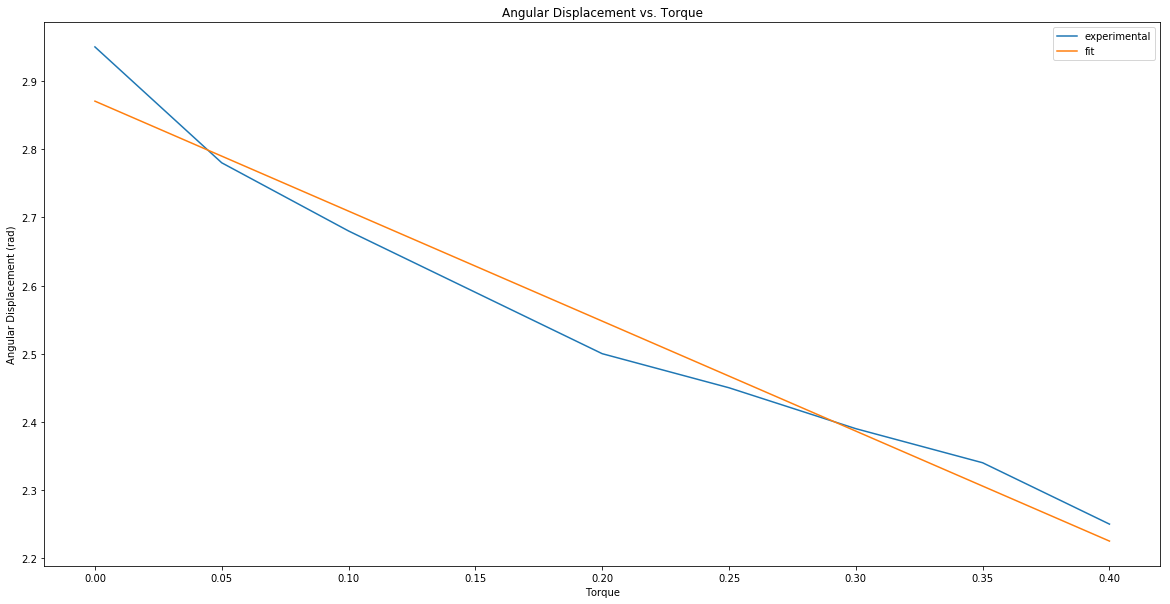

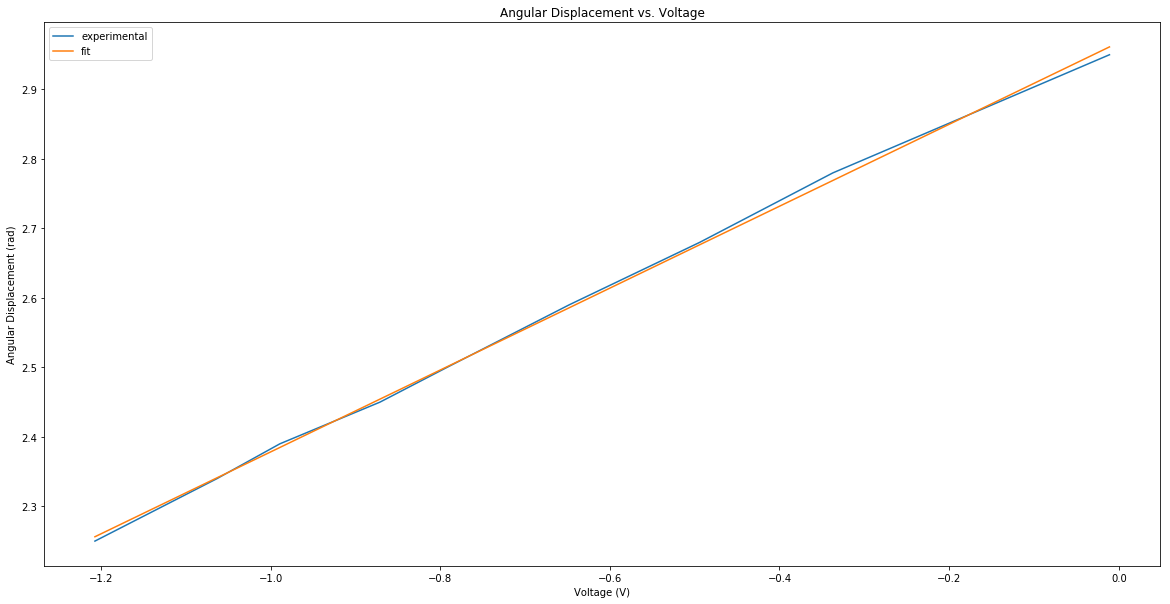

In [3]:
m = np.array([0,.050,.100,.150,.200,.250,.300,.350,.400]) #kg
rad = np.array([2.95,2.78,2.68,2.59,2.5,2.45,2.39,2.34,2.25])
volt = np.array([-0.011,-.337,-.494,-.648,-.792,-.871,-.989,-1.063,-1.207])

lfit= lambda x,m,b: m*x+b

fit,covar = curve_fit(lfit,m,rad)
print(fit)
plt.figure(figsize=[20,10])
plt.plot(m,rad,label='experimental')
plt.xlabel('Torque')
plt.ylabel('Angular Displacement (rad)')
plt.title('Angular Displacement vs. Torque')
plt.plot(m,lfit(m,*fit),label='fit')
plt.legend(loc='best')

fit2,covar2 = curve_fit(lfit,volt,rad)
print(fit2)
plt.figure(figsize=[20,10])
plt.plot(volt,rad,label='experimental')
plt.xlabel('Voltage (V)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Angular Displacement vs. Voltage')
plt.plot(volt,lfit(volt,*fit2),label='fit')
plt.legend(loc='best')

Now that we see that the angular position varies linearly with the mass (and subsequently the voltage reading) of the system, we can look towards the torsion constant $\kappa$:

$\tau = -\kappa \theta$

Now, $\kappa$ is in units of $N/m$, so we have to convert our radian measures to measures of arclength. To get the Newtons, we can take our masses * $9.8$ N and dividing it by our arclength array.

In [4]:
radius=0.05 #m
s = radius*(rad-rad[0])
print(s)
kappa = (m[1:]*9.8)/s[1:]
print("kappa: ",np.average(kappa))

[ 0.     -0.0085 -0.0135 -0.018  -0.0225 -0.025  -0.028  -0.0305 -0.035 ]
kappa:  -90.80955569841777


## Analysis

In [5]:
import pandas as pd
df = pd.read_csv('PaddleData.csv')
df.head()

,time,V
0,0.00000,1.04
1,0.00005,1.04
2,0.00010,1.02
3,0.00015,1.04
4,0.00020,1.04


Text(0.5,1,'Voltage vs. Time for Drag by Air Resistance')

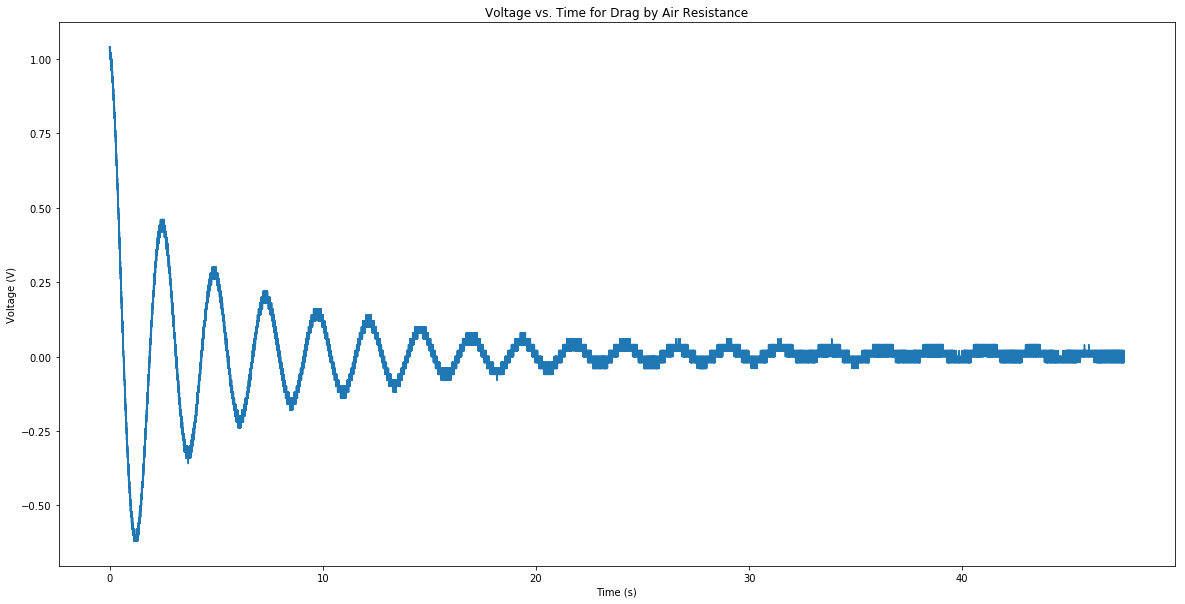

In [6]:
plt.figure(figsize=[20,10])
plt.plot(df['time'],df['V'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time for Drag by Air Resistance')

In [7]:
xpeaks=[]
tpeaks=[]
a=100
for i in range(a,np.size(df['time'])-a):
    if((df['V'][i]-df['V'][i-a])*(df['V'][i+a]-df['V'][i])):
        xpeaks.append(np.abs(df['V'][i]))
        tpeaks.append(np.abs(df['time'][i]))

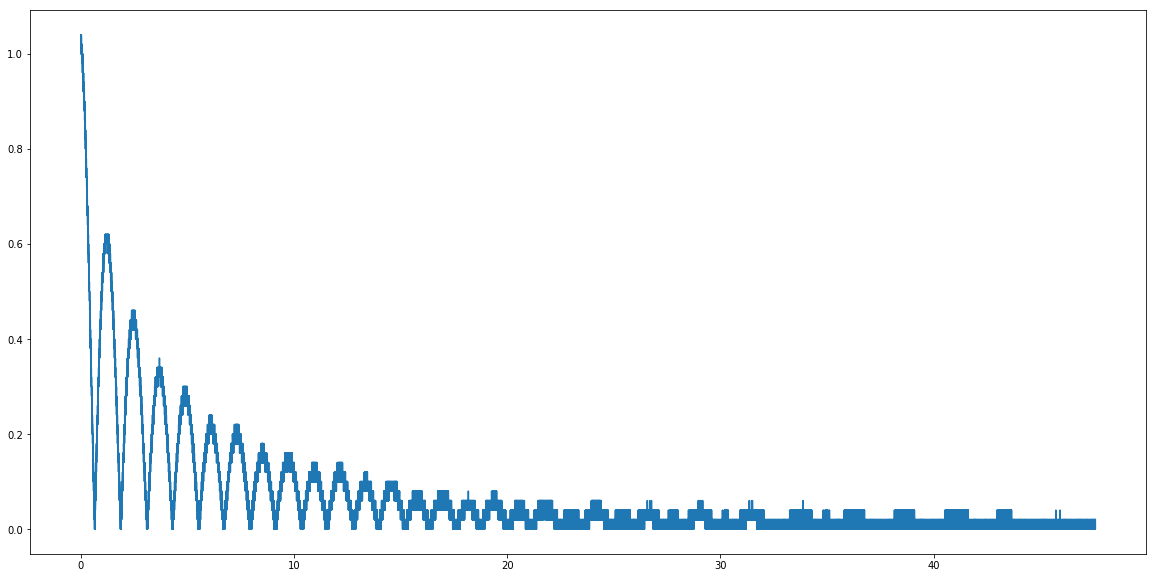

In [8]:
plt.figure(figsize=[20,10])
plt.plot(tpeaks,xpeaks)

Text(0.5,1,'Voltage vs. Time for Magnetic Damping')

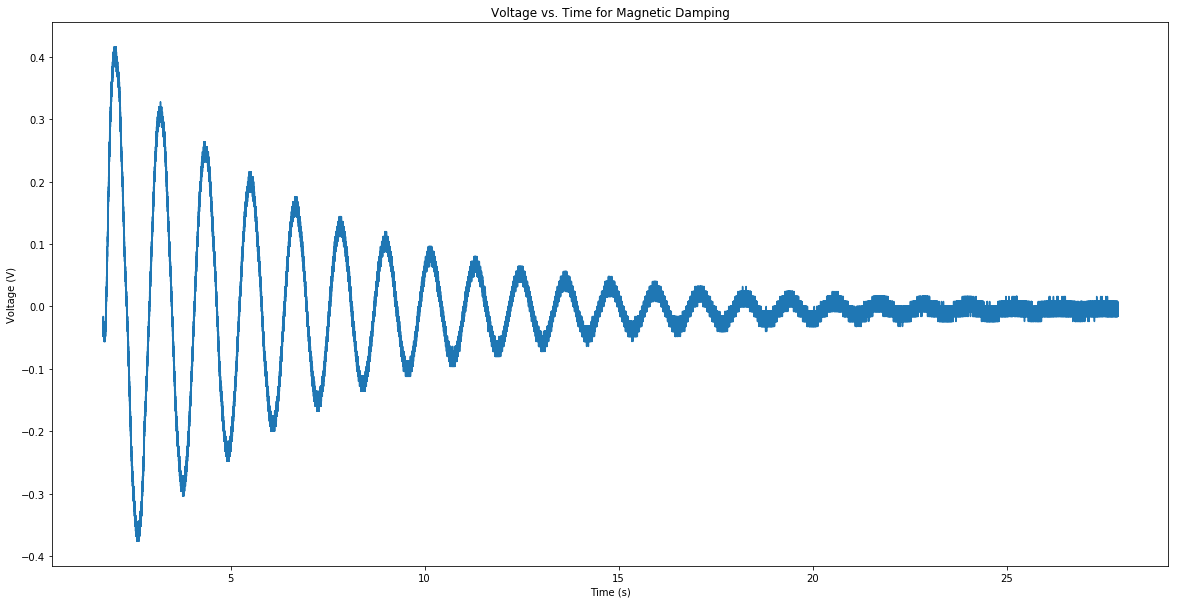

In [9]:
drag1 = np.genfromtxt('Drag1.csv',delimiter=',')

drag1t = drag1[:,0]
drag1v = drag1[:,1]

plt.figure(figsize=[20,10])
plt.plot(drag1t,drag1v)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time for Magnetic Damping')

Text(0.5,1,'Voltage vs. Time for Damping by Friction')

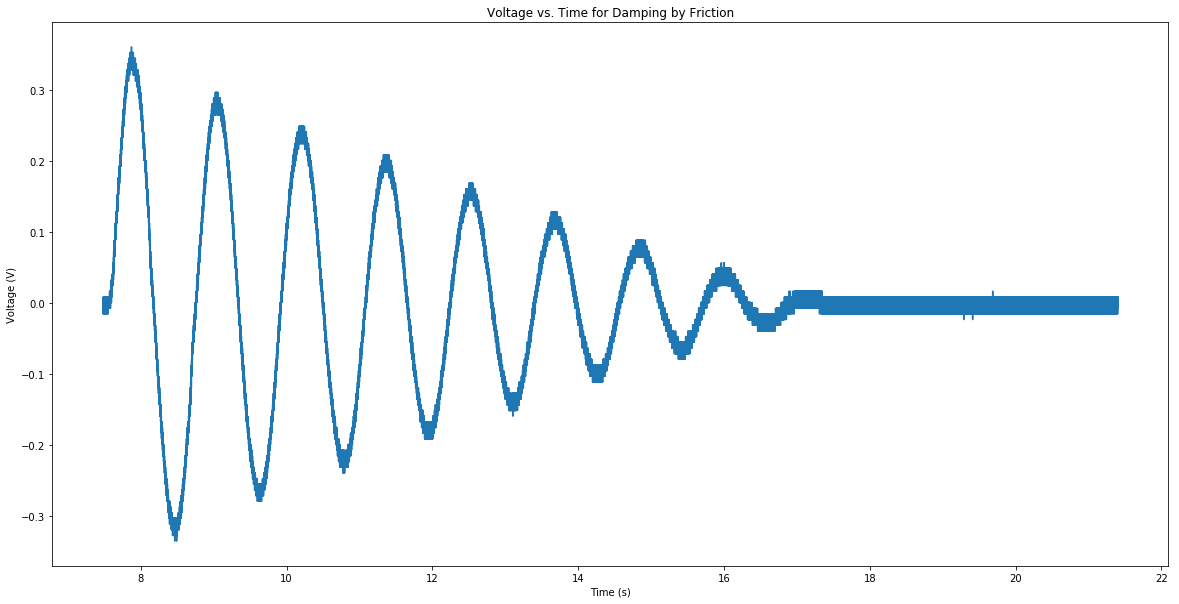

In [10]:
drag2 = np.genfromtxt('Drag2.csv',delimiter=',')

drag2t = drag2[25000:,0]
drag2v = drag2[25000:,1]

plt.figure(figsize=[20,10])
plt.plot(drag2t,drag2v)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Time for Damping by Friction')